In [1]:
import os
import json
import h5py
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data = h5py.File("../datasets/fcnet_tabular_benchmarks/fcnet_naval_propulsion_data.hdf5", 'r')

In [247]:
def read_fcnet_data(f):
    
    frames = []

    for i, config_str in enumerate(data.keys()):

        if i > 30:
            break

        config = json.loads(config_str)

        for seed in range(4):

            config["seed"] = seed

            for attr in data[config_str].keys():
                config[attr] = data[config_str][attr][seed]

            frame = pd.DataFrame(config)
            frame.index.name = "epoch"
            frame.reset_index(inplace=True)

            frames.append(frame)

    return pd.concat(frames, axis="index", ignore_index=True, sort=True)

In [248]:
d = thing(data)
d

,activation_fn_1,activation_fn_2,batch_size,dropout_1,dropout_2,epoch,final_test_error,init_lr,lr_schedule,n_params,n_units_1,n_units_2,runtime,seed,train_loss,train_mse,valid_loss,valid_mse
0,relu,relu,16,0.0,0.0,0,0.000865,0.0005,const,18689.0,128,128,68.685539,0,0.832899,0.832899,0.578864,0.578864
1,relu,relu,16,0.0,0.0,1,0.000865,0.0005,const,18689.0,128,128,68.685539,0,0.398147,0.398147,0.289253,0.289253
2,relu,relu,16,0.0,0.0,2,0.000865,0.0005,const,18689.0,128,128,68.685539,0,0.206296,0.206296,0.129314,0.129314
3,relu,relu,16,0.0,0.0,3,0.000865,0.0005,const,18689.0,128,128,68.685539,0,0.110668,0.110668,0.103157,0.103157
4,relu,relu,16,0.0,0.0,4,0.000865,0.0005,const,18689.0,128,128,68.685539,0,0.065989,0.065989,0.050588,0.050588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,relu,relu,16,0.0,0.0,95,0.000329,0.0005,const,9473.0,64,128,67.052414,3,0.001137,0.001137,0.001373,0.001373
12396,relu,relu,16,0.0,0.0,96,0.000329,0.0005,const,9473.0,64,128,67.052414,3,0.001136,0.001136,0.000625,0.000625
12397,relu,relu,16,0.0,0.0,97,0.000329,0.0005,const,9473.0,64,128,67.052414,3,0.001629,0.001629,0.000755,0.000755
12398,relu,relu,16,0.0,0.0,98,0.000329,0.0005,const,9473.0,64,128,67.052414,3,0.004921,0.004921,0.001576,0.001576


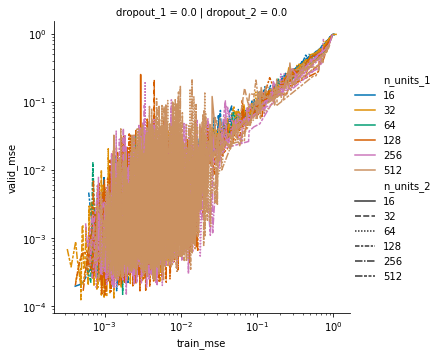

In [250]:
g = sns.relplot(x="train_mse", y="valid_mse", hue="n_units_1", style="n_units_2",
                row="dropout_1", col="dropout_2", ci="sd",
                #                 units="seed", estimator=None, 
                kind="line", palette="colorblind",
                data=d)
g.set(xscale="log", yscale="log")

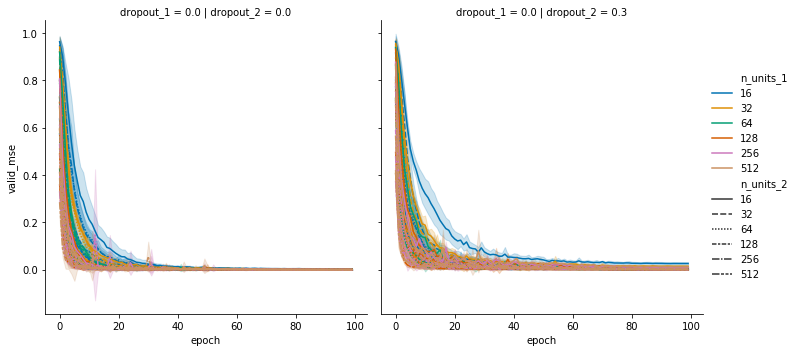

In [234]:
g = sns.relplot(x="epoch", y="valid_mse", hue="n_units_1", style="n_units_2",
                row="dropout_1", col="dropout_2", ci="sd",
                #                 units="seed", estimator=None, 
                kind="line", palette="colorblind",
                data=d.query("batch_size == 16 and activation_fn_1 == 'relu' and activation_fn_2 == 'relu' and init_lr == 5e-4 and lr_schedule == 'cosine'"))
g.set(xscale="log", yscale="log")

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(x="epoch", y="valid_mse", hue="seed", data=df, ax=ax)

ax.set_xscale("log")
ax.set_yscale("log")

plt.show()

In [182]:
frame = d.query("batch_size == 16 and activation_fn_1 == 'relu' and activation_fn_2 == 'relu' and init_lr == 1e-3 and lr_schedule == 'cosine'")
frame.drop()

,activation_fn_1,activation_fn_2,batch_size,dropout_1,dropout_2,final_test_error,init_lr,lr_schedule,n_units_1,n_units_2,runtime,seed
0,relu,relu,16,0.0,0.0,0.000050,0.001,cosine,128,128,69.332703,0
1,relu,relu,16,0.0,0.0,0.000060,0.001,cosine,128,128,68.503426,1
2,relu,relu,16,0.0,0.0,0.000061,0.001,cosine,128,128,69.037300,2
3,relu,relu,16,0.0,0.0,0.000097,0.001,cosine,128,128,70.250732,3
0,relu,relu,16,0.0,0.0,0.000124,0.001,cosine,128,16,65.292336,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3,relu,relu,16,0.6,0.6,0.270538,0.001,cosine,64,512,87.228561,3
0,relu,relu,16,0.6,0.6,0.086374,0.001,cosine,64,64,69.041565,0
1,relu,relu,16,0.6,0.6,0.093713,0.001,cosine,64,64,61.913139,1
2,relu,relu,16,0.6,0.6,0.077933,0.001,cosine,64,64,68.075066,2


KeyboardInterrupt: 

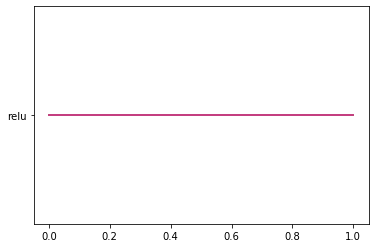

In [185]:
fig, ax = plt.subplots()

pd.plotting.parallel_coordinates(frame=d[["activation_fn_1", "activation_fn_2", "final_test_error"]], 
                                 class_column="final_test_error", ax=ax)

plt.show()

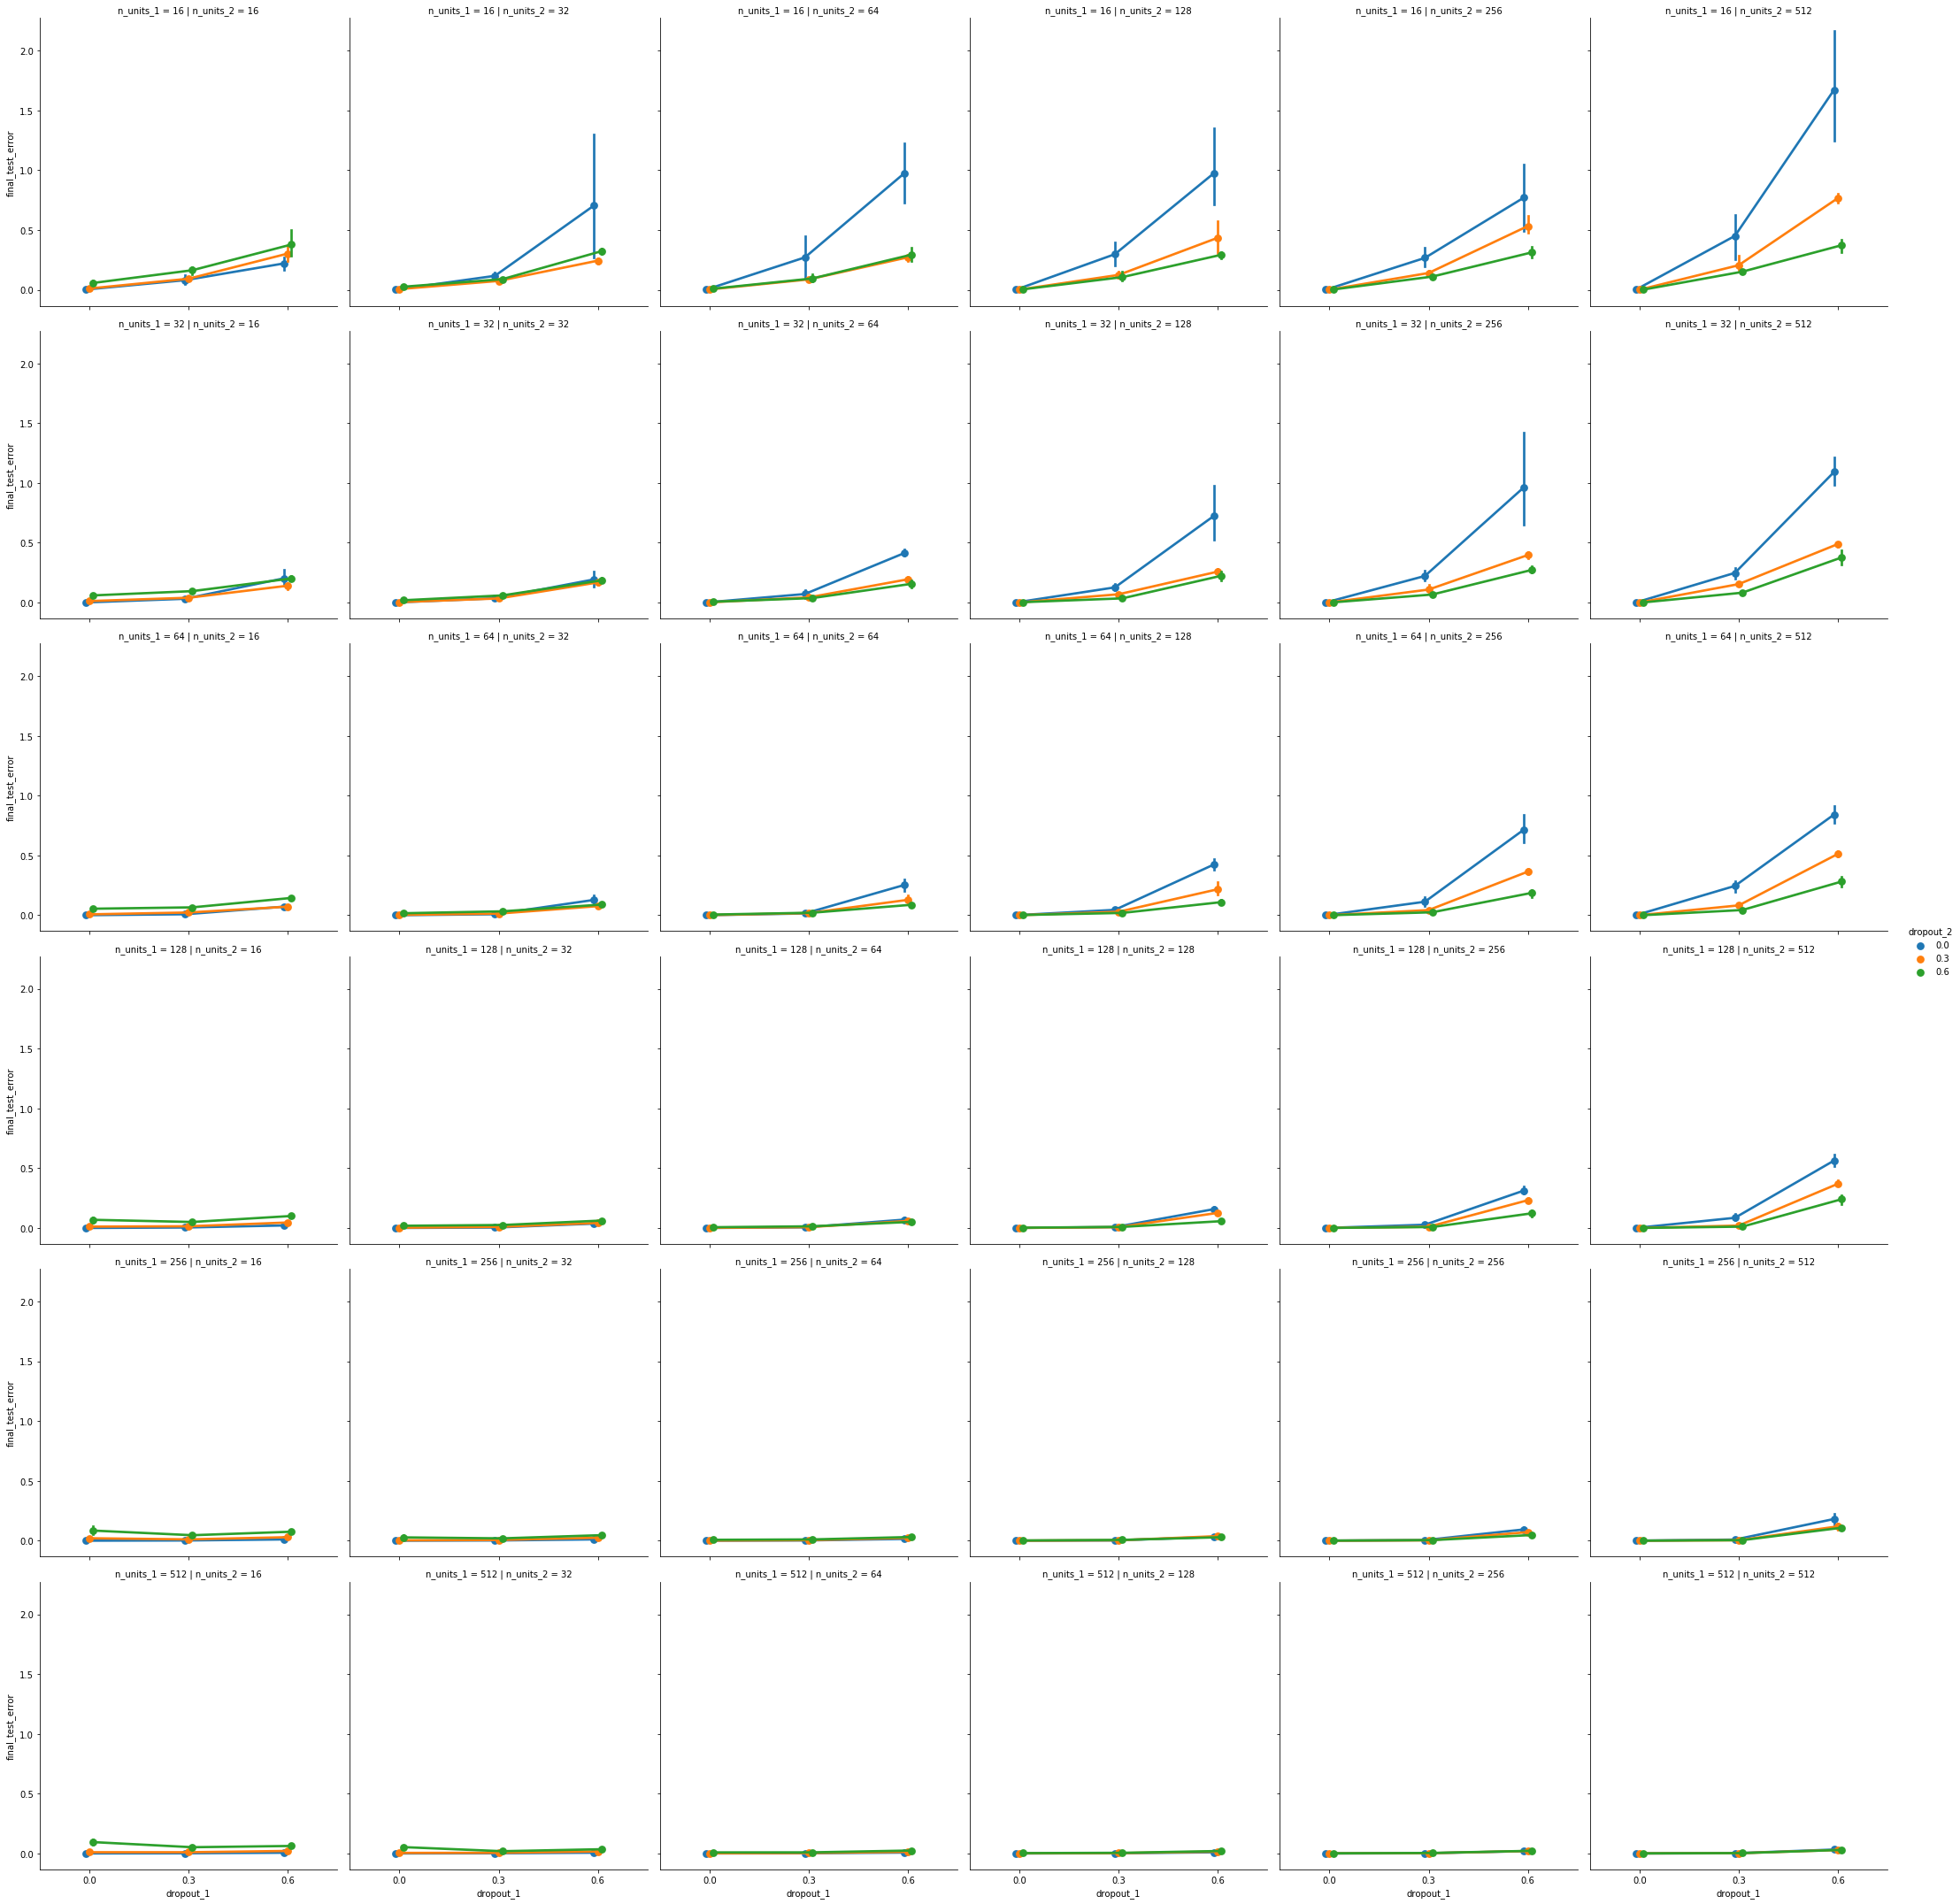

In [181]:
g = sns.catplot(x="dropout_1", y="final_test_error", hue="dropout_2", 
                row="n_units_1", col="n_units_2",
                data=d.query("batch_size == 16 and activation_fn_1 == 'relu' and activation_fn_2 == 'relu' and init_lr == 1e-3 and lr_schedule == 'cosine'"),
                kind="point", dodge=True) # , facet_kws=dict(ylim=(-1e-1, 3.0)))

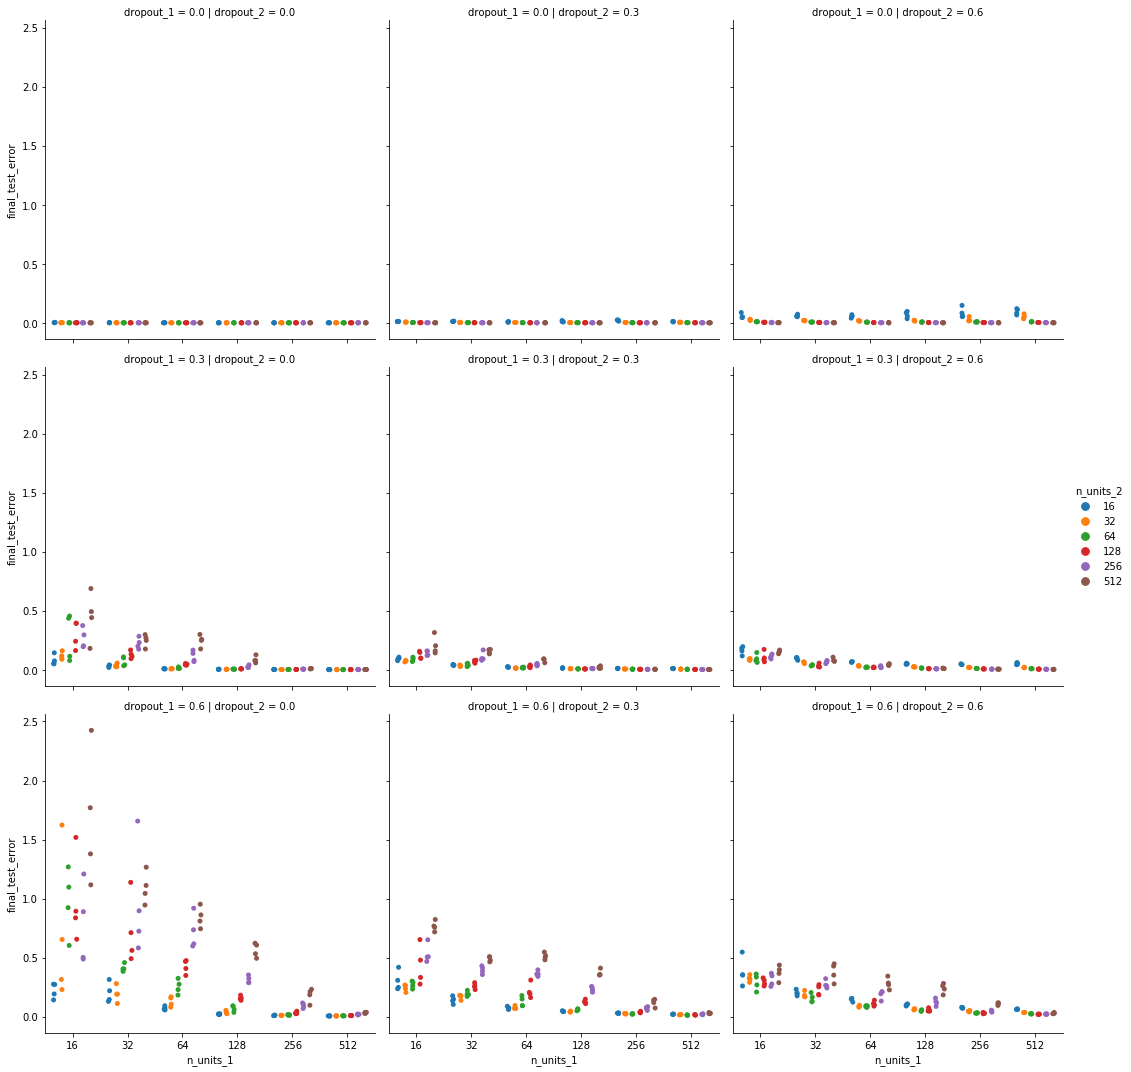

In [179]:
g = sns.catplot(x="n_units_1", y="final_test_error", hue="n_units_2", 
                row="dropout_1", col="dropout_2",
                data=d.query("batch_size == 16 and activation_fn_1 == 'relu' and activation_fn_2 == 'relu' and init_lr == 1e-3 and lr_schedule == 'cosine'"),
                kind="strip", dodge=True) # , facet_kws=dict(ylim=(-1e-1, 3.0)))

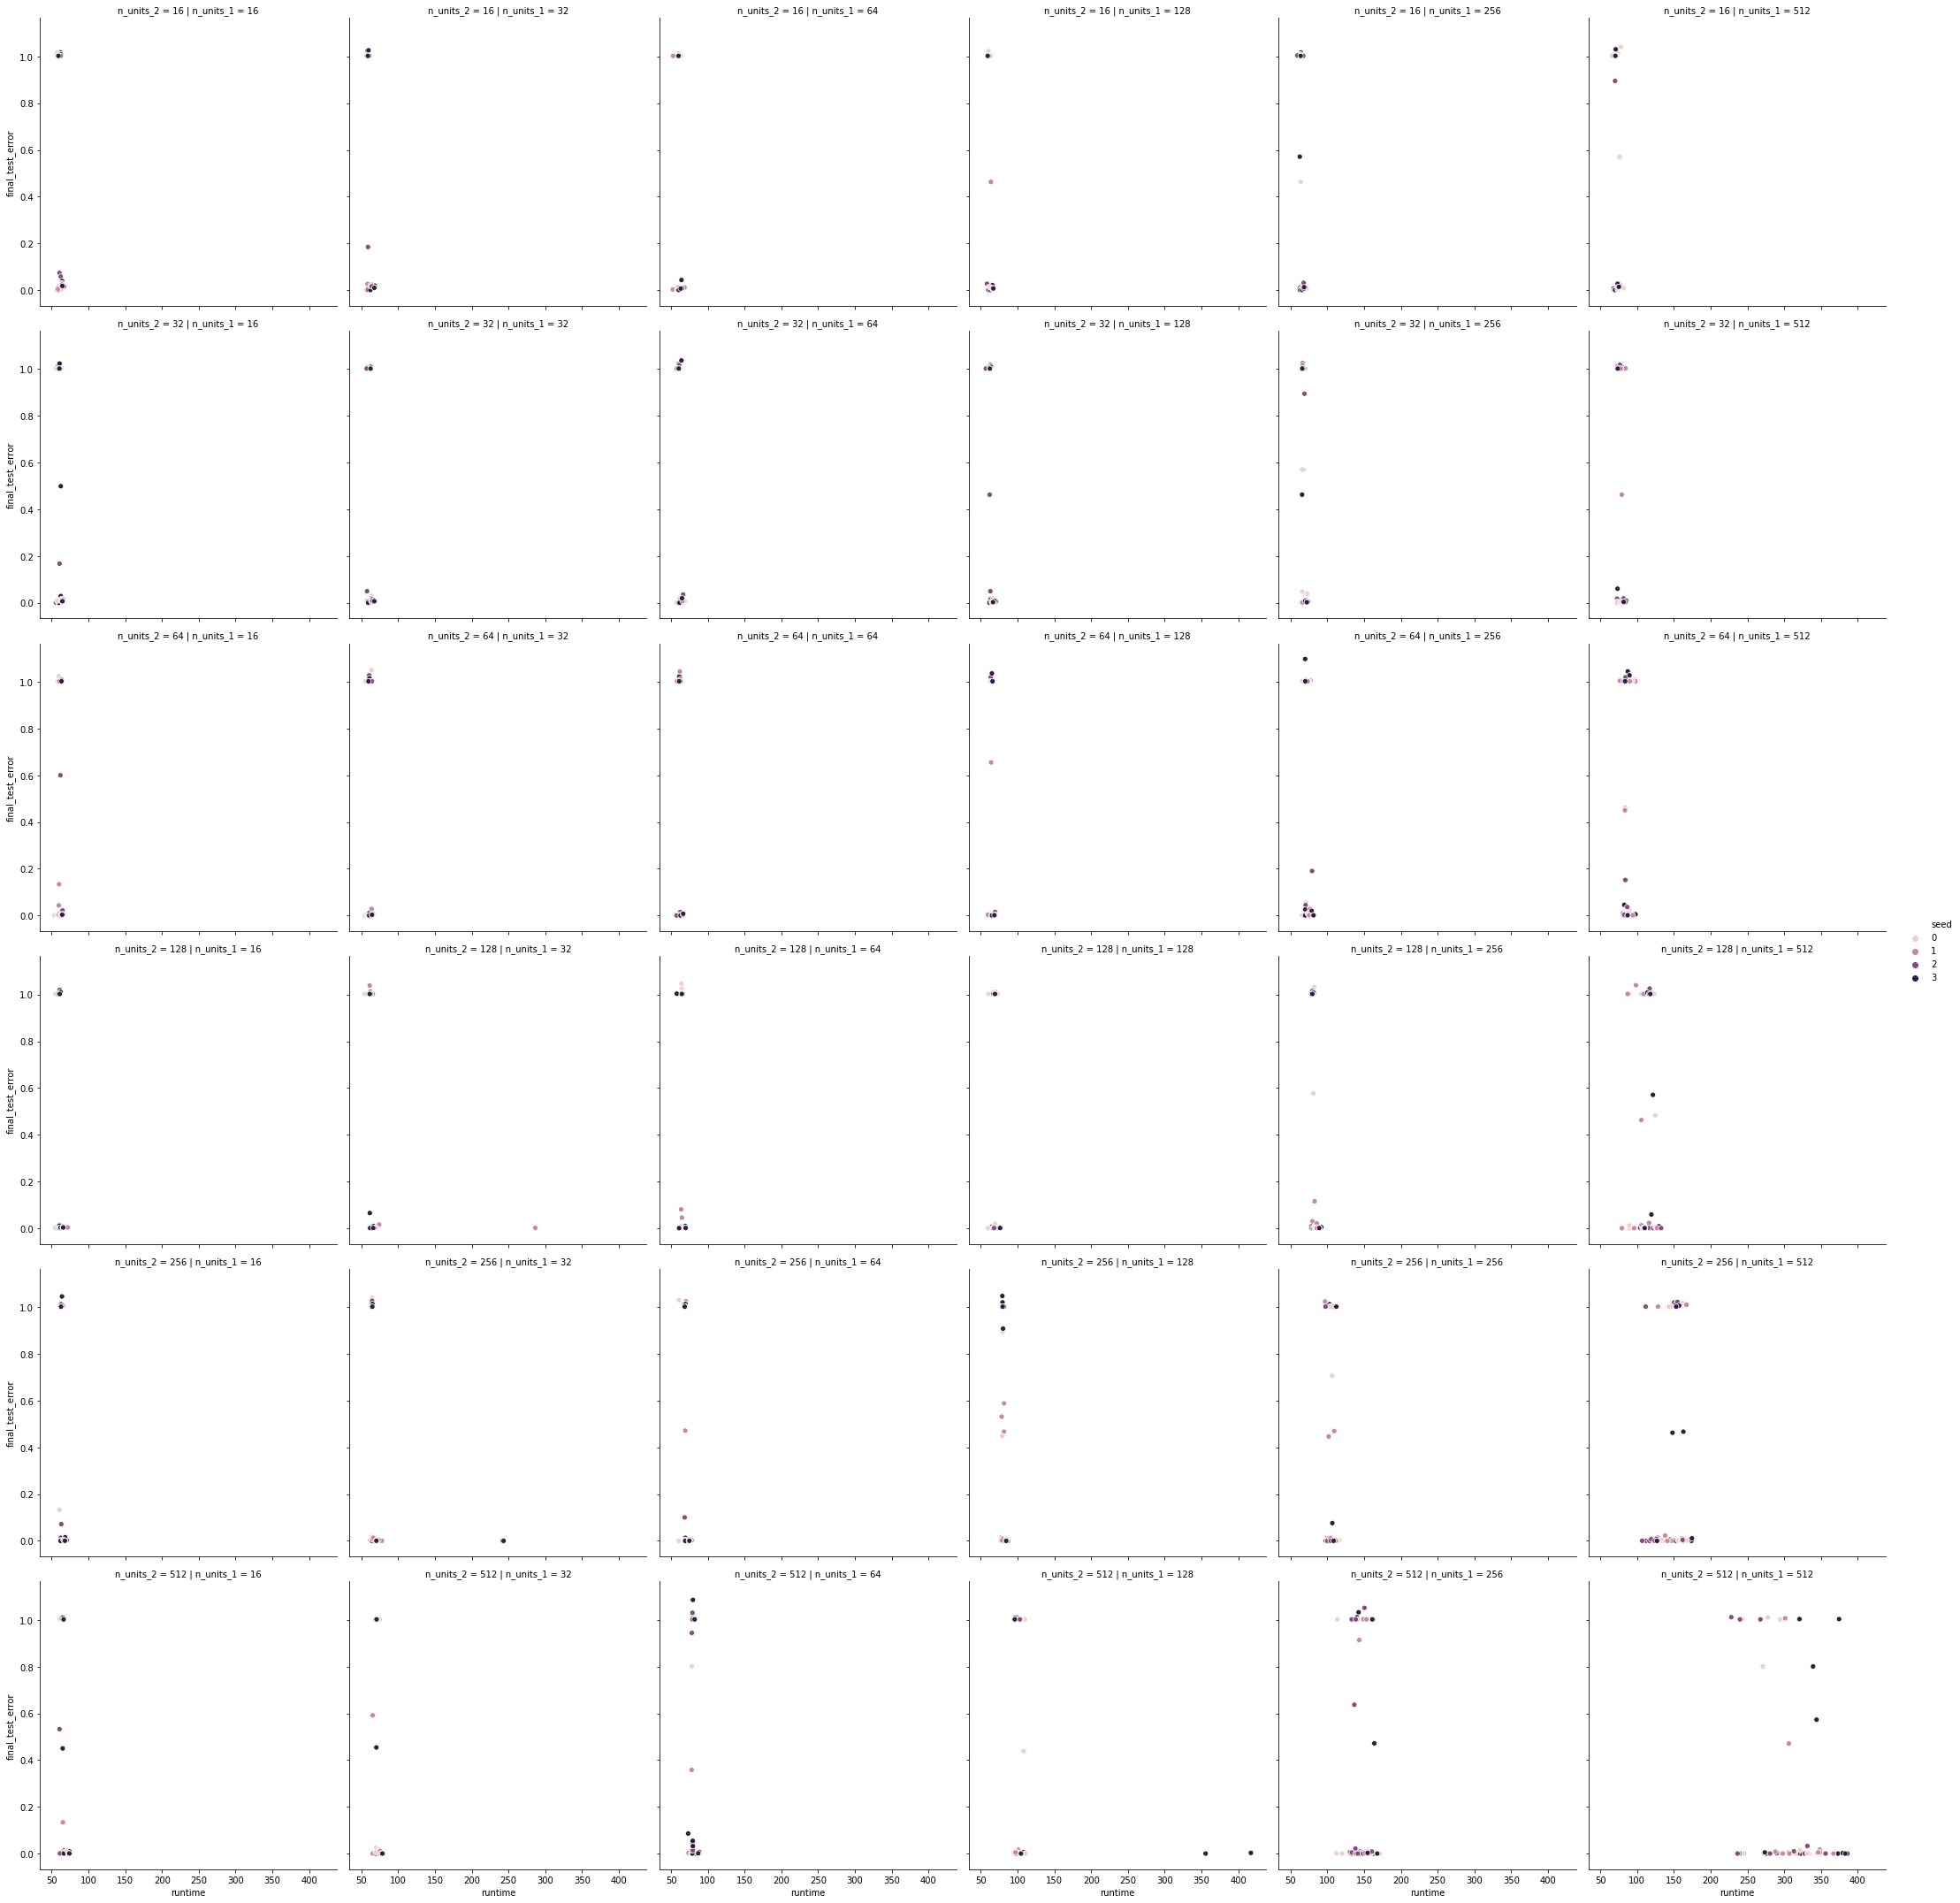

In [143]:
g = sns.relplot(x="runtime", y="final_test_error", hue="seed",
                col="n_units_1", row="n_units_2", data=d)

In [ ]:
fig, ax = plt.subplots()

sns.lineplot(x="epoch", y="valid_mse", hue="seed", data=df, ax=ax)

ax.set_xscale("log")
ax.set_yscale("log")

plt.show()

In [60]:
data[k_str].keys()

<KeysViewHDF5 ['final_test_error', 'n_params', 'runtime', 'train_loss', 'train_mse', 'valid_loss', 'valid_mse']>

In [61]:
data[k_str]['final_test_error']

<HDF5 dataset "final_test_error": shape (4,), type "<f4">

In [62]:
data[k_str]['runtime']

<HDF5 dataset "runtime": shape (4,), type "<f4">

In [63]:
data[k_str]['train_loss']

<HDF5 dataset "train_loss": shape (4, 100), type "<f4">

In [64]:
data[k_str]['train_mse']

<HDF5 dataset "train_mse": shape (4, 100), type "<f4">

In [65]:
data[k_str]['valid_loss']

<HDF5 dataset "valid_loss": shape (4, 100), type "<f4">

In [66]:
data[k_str]['valid_mse']

<HDF5 dataset "valid_mse": shape (4, 100), type "<f4">

In [67]:
df = pd.DataFrame(data=data[k_str]["valid_mse"])
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.734614,2.113721,1.350231,4.874994,1.077193,1.377291,1.181435,1.227036,1.226772,2.293494,...,1.012897,1.040622,1.040863,1.015676,1.014634,1.009925,1.009656,1.013628,1.007647,1.007678
1,1.203883,2.267712,3.458457,1.290707,1.640161,1.495215,4.107715,1.057369,3.038551,1.113510,...,1.011576,1.054593,1.007841,1.017648,1.012368,1.008921,1.010603,1.008769,1.008616,1.008589
2,2.309532,1.202388,2.130732,1.011377,5.621019,3.139337,1.372328,2.651876,1.153165,1.293586,...,1.089113,1.014821,1.008748,1.016353,1.007551,1.008376,1.010865,1.007526,1.010572,1.008985
3,1.207875,1.570243,1.418002,1.406689,1.335818,1.159295,1.125975,3.456938,1.106048,2.552064,...,1.010929,1.042321,1.018297,1.015000,1.008538,1.009997,1.009969,1.008540,1.007924,1.007868


In [68]:
d = pd.DataFrame(data[k_str]['valid_mse'])
d.index.name = "seed"
d.columns.name = "epoch"
s = d.stack()
s.name = "valid_mse"
df = s.reset_index()
df

,seed,epoch,valid_mse
0,0,0,1.734614
1,0,1,2.113721
2,0,2,1.350231
3,0,3,4.874994
4,0,4,1.077193
...,...,...,...
395,3,95,1.009997
396,3,96,1.009969
397,3,97,1.008540
398,3,98,1.007924


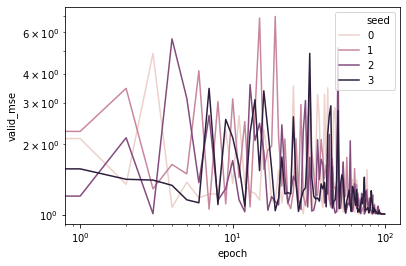

In [69]:
fig, ax = plt.subplots()

sns.lineplot(x="epoch", y="valid_mse", hue="seed", data=df, ax=ax)

ax.set_xscale("log")
ax.set_yscale("log")

plt.show()